# Desafío Técnico - Mercado Libre

#### Ezequiel Panzarasa

# Análisis exploratorio de datos

## Armado de Dataset
Después de explorar un poco la API pública de Mercado Libre, se decidió optar por el armado de un dataset de 10.000 registros. Siendo que la API tiene un offset máximo de 1000, se decidió tomar las 10 categorías más populares (de acuerdo a la página principal de MercadoLibre. Ver imagen adjunta) y armar el dataset con 1.000 registros de cada categoría. <br>
Se eligieron estas 10 categorías siguiendo la hipótesis de que a mayor popularidad se tiene un mayor número de ventas, y más representativa resulta la información obtenida en la muestra para cada una de las publicaciones. 

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 103)

##### Ver armado de dataset en MLC_03_RAW_DATASET.ipynb

In [2]:
raw_dataset_df = pd.read_csv("raw_dataset.csv", header=0, index_col=0, sep='|')
raw_dataset_df

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,stop_time,condition,permalink,thumbnail,thumbnail_id,accepts_mercadopago,attributes,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,catalog_listing,order_backend,seller.id,seller.permalink,seller.registration_date,seller.car_dealer,seller.real_estate_agency,seller.tags,seller.eshop.nick_name,seller.eshop.eshop_rubro,seller.eshop.eshop_id,seller.eshop.eshop_locations,seller.eshop.site_id,seller.eshop.eshop_logo_url,seller.eshop.eshop_status_id,seller.eshop.seller,seller.eshop.eshop_experience,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.claims.period,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.delayed_handling_time.period,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,seller.seller_reputation.metrics.cancellations.period,seller.seller_reputation.level_id,prices.id,prices.prices,prices.presentation.display_currency,prices.payment_method_prices,installments.quantity,installments.amount,installments.rate,installments.currency_id,address.state_id,address.state_name,address.city_id,address.city_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller_address.id,seller_address.comment,seller_address.address_line,seller_address.zip_code,seller_address.country.id,seller_address.country.name,seller_address.state.id,seller_address.state.name,seller_address.city.id,seller_address.city.name,seller_address.latitude,seller_address.longitude,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,differential_pricing.id,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.protection_end_date,seller.seller_reputation.real_level,seller.eshop.eshop_rubro.id,seller.eshop.eshop_rubro.name,seller.eshop.eshop_rubro.category_id,seller.car_dealer_logo
0,MLA900810750,MLA,Repetidor Tp-link Tl-wa850re Blanco 1 Unidad,2055.00,NaN,ARS,83,3179,buy_it_now,gold_special,2040-12-07T04:00:00.000Z,new,https://www.mercadolibre.com.ar/repetidor-tp-l...,http://http2.mlstatic.com/D_668117-MLA31786420...,668117-MLA31786420833_082019,True,"[{'value_name': 'wa850re', 'values': [{'id': N...",NaN,MLA430901,NaN,MLA-ROUTERS_AND_WIRELESS_SYSTEMS,MLA6186903,"['brand_verified', 'good_quality_picture', 'im...",True,1,25679280,http://perfil.mercadolibre.com.ar/MIPCSTORE,2010-03-25T13:17:41.000-04:00,False,False,"['normal', 'user_info_verified', 'eshop', 'cre...",MIPCSTORE,NaN,87206.0,[],MLA,http://resources.mlstatic.com/eshops/25679280.jpg,2.0,25679280.0,0.0,48927.0,2654.0,historic,0.01,0.99,0.00,46273.0,platinum,0.0070,78.0,60 days,0.0001,2.0,60 days,60 days,10628.0,0.0083,93.0,60 days,5_green,MLA900810750,"[{'id': '32', 'type': 'standard', 'conditions'...",ARS,[],12,291.42,70.17,ARS,AR-C,Capital Federal,NaN,Congreso,False,me2,[],cross_docking,False,NaN,NaN,NaN,NaN,AR,Argentina,AR-C,Capital Federal,NaN,Congreso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Analisis preliminar. 
##### Se eliminan todas las columnas que no aporten información. 
##### Ver análisis preliminar en MLC_04_ANALISIS_PRELIMINAR.ipynb

### Limpieza preliminar del Dataset
#### Teniendo en cuenta el resultado del análisis preliminar se decide eliminar los campos que no aporten información. 
##### (Campos que sean todos NULL, o que contengan todos el mismo valor. )

In [3]:
to_drop_list = ["site_id", "sale_price", "currency_id", "buying_mode", "condition", "permalink",
               "thumbnail_id", "thumbnail", "accepts_mercadopago", "catalog_listing", "order_backend",
               "seller.permalink", "seller.car_dealer", "seller.real_estate_agency",
               "seller.eshop.eshop_rubro", "seller.eshop.eshop_id", "seller.eshop.eshop_locations", 
               "seller.eshop.site_id", "seller.eshop.eshop_logo_url", "seller.eshop.seller", "seller.eshop.eshop_experience",
               "seller.seller_reputation.transactions.period", "seller.seller_reputation.metrics.claims.period", "seller.seller_reputation.metrics.delayed_handling_time.period",
               "seller.seller_reputation.metrics.delayed_handling_time.period", "seller.seller_reputation.metrics.cancellations.period", "seller.seller_reputation.level_id", 
               "prices.presentation.display_currency", "prices.payment_method_prices", "installments.currency_id", "address.state_id", "address.city_id", 
               "shipping.mode", "shipping.store_pick_up", "seller_address.id", "seller_address.address_line", "seller_address.comment",
               "seller_address.zip_code", "seller_address.country.id", "seller_address.country.name", "seller_address.state.id",
               "seller_address.state.name", "seller_address.city.id", "seller_address.city.name", "seller_address.latitude",
               "seller_address.longitude", "seller_address.longitude", "seller.seller_reputation.metrics.sales.period",
               "attributes", "prices.prices", "shipping.tags"]

# La mayoría de las columnas se agregaron a esta lista por no tener información relevante. 
# Algunas se agregaron por tener información repetida (seller.address.*). 
# "attributes", "prices.prices", "shipping.tags" se agregaron arbitrariamente.

In [4]:
raw_dataset_df.drop(axis=1, labels=to_drop_list, inplace=True)

In [5]:
raw_dataset_df

,id,title,price,available_quantity,sold_quantity,listing_type_id,stop_time,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,seller.id,seller.registration_date,seller.tags,seller.eshop.nick_name,seller.eshop.eshop_status_id,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,prices.id,installments.quantity,installments.amount,installments.rate,address.state_name,address.city_name,shipping.free_shipping,shipping.logistic_type,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,differential_pricing.id,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.protection_end_date,seller.seller_reputation.real_level,seller.eshop.eshop_rubro.id,seller.eshop.eshop_rubro.name,seller.eshop.eshop_rubro.category_id,seller.car_dealer_logo
0,MLA900810750,Repetidor Tp-link Tl-wa850re Blanco 1 Unidad,2055.00,83,3179,gold_special,2040-12-07T04:00:00.000Z,NaN,MLA430901,NaN,MLA-ROUTERS_AND_WIRELESS_SYSTEMS,MLA6186903,"['brand_verified', 'good_quality_picture', 'im...",25679280,2010-03-25T13:17:41.000-04:00,"['normal', 'user_info_verified', 'eshop', 'cre...",MIPCSTORE,2.0,48927.0,2654.0,0.01,0.99,0.00,46273.0,platinum,0.0070,78.0,0.0001,2.0,10628.0,0.0083,93.0,MLA900810750,12,291.42,70.17,Capital Federal,Congreso,False,cross_docking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLA856313404,Disco Sólido Interno Kingston Sa400s37/240g 240gb,3688.00,40,5858,gold_special,2040-05-13T04:00:00.000Z,NaN,MLA1672,NaN,MLA-HARD_DRIVES_AND_SSDS,MLA6408981,"['brand_verified', 'good_quality_picture', 'go...",215299808,2016-05-26T16:28:35.000-04:00,"['normal', 'user_info_verified', 'mshops', 'de...",NaN,NaN,132235.0,6683.0,0.03,0.95,0.02,125552.0,platinum,0.0125,264.0,0.1341,2703.0,20135.0,0.0074,157.0,MLA856313404,12,522.99,70.17,Capital Federal,Núñez,True,cross_docking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MLA618887655,Pc Armada Cpu Amd Full Gamer A10-9700 16gb Ddr...,53999.00,250,500,gold_pro,2037-08-24T02:40:31.000Z,74999.0,MLA1649,NaN,MLA-DESKTOP_COMPUTERS,NaN,"['ahora-12', 'brand_verified', 'extended_warra...",1534239,2006-11-06T12:57:16.000-04:00,"['normal', 'user_info_verified', 'eshop', 'msh...",4KRC,2.0,22407.0,2065.0,0.02,0.95,0.03,20342.0,platinum,0.0080,43.0,0.0000,0.0,5041.0,0.0088,47.0,MLA618887655,18,2999.94,0.00,Capital Federal,Palermo,True,cross_docking,0.001,5.0,35713231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MLA855055612,Notebook Exo Smart E19 Intel Celeron Ram4gb Ss...,39999.00,500,5000,gold_pro,2040-05-07T04:00:00.000Z,46799.0,MLA1652,341.0,MLA-NOTEBOOKS,MLA16368693,"['good_quality_thumbnail', 'ahora-12', 'brand_...",180214913,2015-03-30T11:39:13.000-04:00,"['brand', 'user_info_verified', 'large_seller'...",NaN,NaN,26668.0,2025.0,0.04,0.94,0.02,24643.0,platinum,0.0045,9.0,0.0000,0.0,1872.0,0.0000,0.0,MLA855055612,18,2222.17,0.00,Capital Federal,Parque Patricios,True,fulfillment,NaN,NaN,35713231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MLA841426834,Pasta Térmica Arctic Mx-4 4grs. Alto Rendimien...,1600.00,500,500,gold_sp

##### Se redujo el dataset de 102 columnas, a 53 (que pueden o no tener información útil)

# Análisis específico de items con descuento

#### Armado del dataset

In [6]:
discount_df = raw_dataset_df[raw_dataset_df["original_price"].notnull()]

In [15]:
len_disc_df = len(discount_df)
len_raw_df = len(raw_dataset_df)

print("Número total de ítems con descuento en la muestra:", len_disc_df)
print("Porcentaje de ítems con descuento en la muestra: {} %".format(round((len_disc_df / len_raw_df) * 100, 2)))

Número total de ítems con descuento en la muestra: 2118
Porcentaje de ítems con descuento en la muestra: 20.2 %


### ¿Cuántos productos con descuento hay en cada categoría?

In [18]:
discount_df.groupby("category_id").count().sort_values(by=["id"], ascending=False)['id']

category_id
MLA1652      87
MLA6143      60
MLA5411      54
MLA109027    52
MLA1055      51
             ..
MLA411829     1
MLA411151     1
MLA411071     1
MLA411069     1
MLA9913       1
Name: id, Length: 509, dtype: int64

##### A pesar de que se armó el dataset crudo apuntando a tener 10 categorías, la variable category_id parece tener mayor granularidad.

In [26]:
# Ejemplos para mostrar la granularidad. 
print(discount_df[discount_df["category_id"] == "MLA1652"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA6143"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA5411"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA109027"].groupby("domain_id").count()['id'], "\n")

domain_id
MLA-NOTEBOOKS    87
Name: id, dtype: int64 

domain_id
MLA-BICYCLES    60
Name: id, dtype: int64 

domain_id
MLA-HAIR_CLIPPERS    54
Name: id, dtype: int64 

domain_id
MLA-SNEAKERS    52
Name: id, dtype: int64 



##### Se concluye entonces, que el campo domain_id es un "user friendly" alias para el campo category_id

### Entonces, la pregunta cambia a: ¿Cuáles son las categorías que ofrecen más productos con descuento?

In [69]:
# Se seleccionan arbitrariamente las 25 categorías que más descuentos ofrecen
discount_df.groupby("domain_id").count().sort_values(by=["id"], ascending=False)['id'].iloc[:25]

domain_id
MLA-NOTEBOOKS                              87
MLA-HEADPHONES                             74
MLA-HAIR_CLIPPERS                          65
MLA-SNEAKERS                               60
MLA-BICYCLES                               60
MLA-TOYS_AND_GAMES                         53
MLA-CELLPHONES                             51
MLA-BOARD_GAMES                            49
MLA-SPEAKERS                               43
MLA-VIDEO_GAMES                            43
MLA-DESKTOP_COMPUTERS                      42
MLA-FANS                                   40
MLA-TV_AND_MONITOR_MOUNTS                  39
MLA-ACTION_FIGURES                         38
MLA-SUPPLEMENTS                            30
MLA-GAME_CONSOLES                          30
MLA-TELEVISIONS                            27
MLA-T_SHIRTS                               24
MLA-DOLLS                                  22
MLA-PANTS                                  21
MLA-SMARTWATCHES                           19
MLA-HAIR_DRYERS         

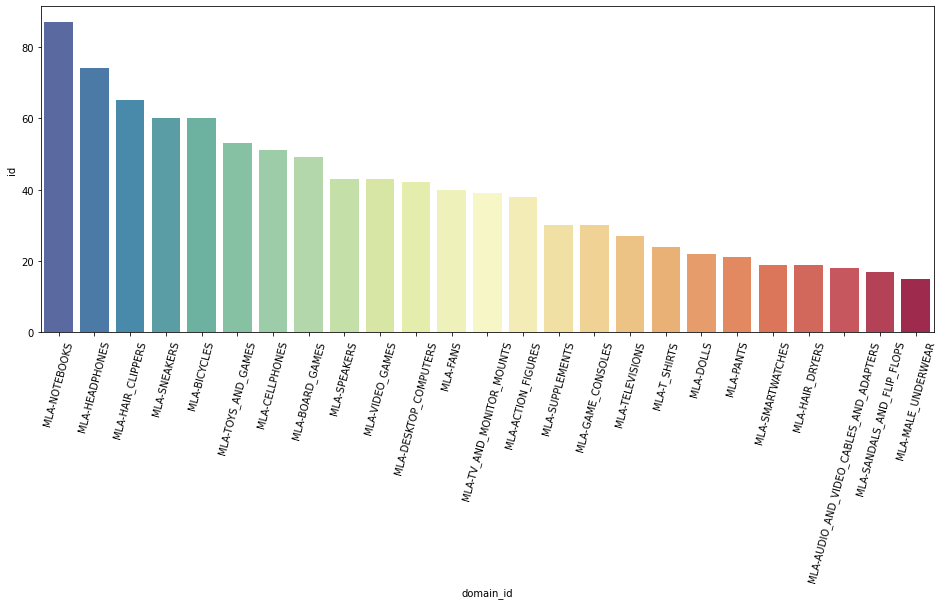

In [84]:
top_categories_df = discount_df.groupby("domain_id").count().sort_values(by=["id"], ascending=False)['id'].iloc[:25].reset_index()


plt.figure(figsize=(16, 6))

bar_plot = sns.barplot(data=top_categories_df, x="domain_id", y="id", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)
    

##### Estos son los valores absolutos para la muestra de ítems con descuento. Entonces, puede seguir la pregunta:
### ¿Estas categorías ofrecen más ítems con descuento porque tienen más ítems en esta categoría, o porque la categoría ofrece más descuentos?
##### Básicamente, lo que se está preguntando es si la distribución de descuentos en la muestra es uniforme o no. 
##### Para responder esta pregunta, vamos a df crudo original. 

In [97]:
# Se toman los mismos 25 domain_ids
top_categories_raw_df = raw_dataset_df[raw_dataset_df["domain_id"].isin(list(top_categories_df["domain_id"].values))]

In [99]:
top_categories_raw_df.groupby("domain_id").count().sort_values(by="id", ascending=False)["id"]

domain_id
MLA-CELLPHONES                             439
MLA-GAME_CONSOLES                          338
MLA-VIDEO_GAMES                            327
MLA-SNEAKERS                               295
MLA-HEADPHONES                             291
MLA-DESKTOP_COMPUTERS                      230
MLA-NOTEBOOKS                              226
MLA-BOARD_GAMES                            178
MLA-SUPPLEMENTS                            168
MLA-T_SHIRTS                               165
MLA-ACTION_FIGURES                         157
MLA-BICYCLES                               156
MLA-HAIR_CLIPPERS                          151
MLA-TELEVISIONS                            145
MLA-PANTS                                  140
MLA-TOYS_AND_GAMES                         122
MLA-FANS                                   108
MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS    101
MLA-SMARTWATCHES                            98
MLA-SPEAKERS                                83
MLA-TV_AND_MONITOR_MOUNTS                   82
MLA

In [100]:
top_categories_raw_df = top_categories_raw_df.groupby("domain_id").count().sort_values(by="id", ascending=False)["id"].reset_index()

##### Hago un join del raw df con el discount df y luego calculo los porcentajes de descuentos ofrecidos en relación al total de publicaciones en esa categoría. 

In [113]:
# Primero renombro las columnas
top_categories_raw_df.columns = ["domain_id", "raw_count"]
top_categories_df.columns = ["domain_id", "discount_count"]

# merge dfs
top_categories_merge_df = top_categories_df.merge(top_categories_raw_df, on=["domain_id"], how="outer")

# Calculo porcentajes
top_categories_merge_df["disc_raw_%"] = top_categories_merge_df.apply(lambda row: round((row["discount_count"] / row["raw_count"]) * 100, 2), axis=1)

In [114]:
top_categories_merge_df.sort_values(by="disc_raw_%", ascending=False)

,domain_id,discount_count,raw_count,disc_raw_%
8,MLA-SPEAKERS,43,83,51.81
12,MLA-TV_AND_MONITOR_MOUNTS,39,82,47.56
21,MLA-HAIR_DRYERS,19,43,44.19
5,MLA-TOYS_AND_GAMES,53,122,43.44
2,MLA-HAIR_CLIPPERS,65,151,43.05
0,MLA-NOTEBOOKS,87,226,38.50
4,MLA-BICYCLES,60,156,38.46
11,MLA-FANS,40,108,37.04
24,MLA-MALE_UNDERWEAR,15,43,34.88
18,MLA-DOLLS,22,66,33.33


##### Las categorías que menos descuentos ofrecen en relación a la cantidad de publicaciones son: Juegos de Video, Celulares y Consolas
##### Parlantes, Mounts para monitores y secadores de pelo son las que más descuentos presentan

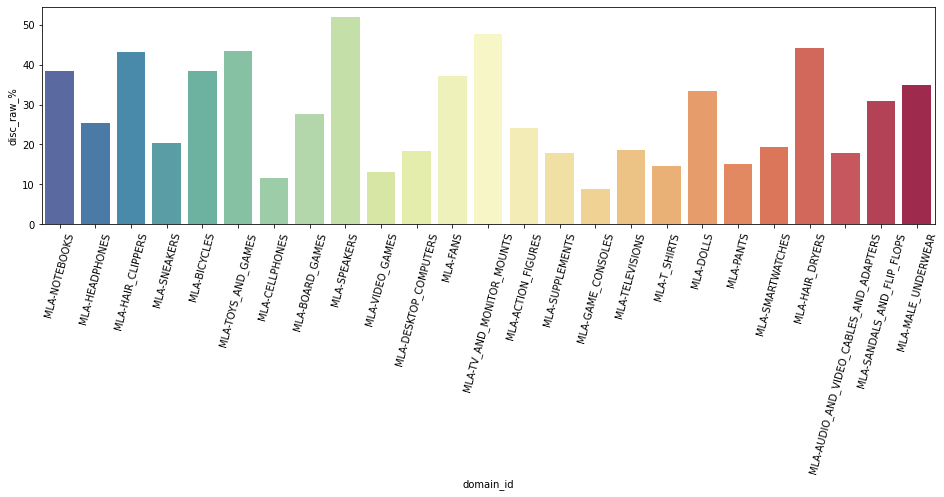

In [143]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=top_categories_merge_df, x="domain_id", y="disc_raw_%", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

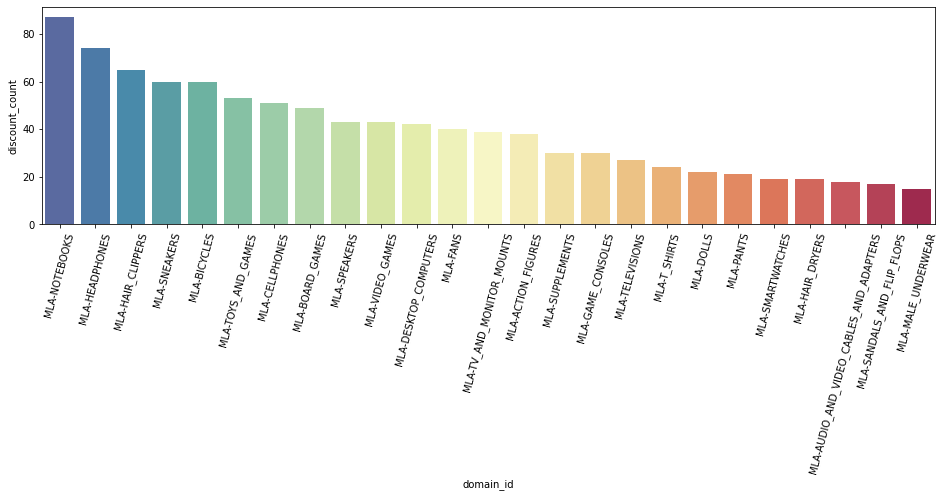

In [144]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=top_categories_merge_df, x="domain_id", y="discount_count", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

GRAFICAR EN UN MISMO GRÁFICO CON DOS EJES Y !!!

### Se ve claramente que la distribución de descuentos no es uniforme.
#### Si tomamos, por ejemplo, el caso de los teléfonos celulares, se ve que rankea alto en cantidad de descuentos. Pero cuando vemos el porcentaje de descuentos en celulares en relación a la cantidad de publicaciones en esta categoría, vemos que está en el anteúltimo puesto. 
##### Se podría resumir en: "Hay muchas publicaciones de celulares en el df de descuentos porque hay muchas publicaciones de celulares, no porque haya muchas publicaciones con descuento en la categoría de celulares"

## Hasta acá se tienen las categorías que más publicaciones con descuento ofrecen. ¿Pero son estas categorías las que ofrecen mayores descuentos?

In [153]:
# Busco en el  discount df de las 25 categorías con más publicaciones
price_discount_df = discount_df[discount_df["domain_id"].isin(list(top_categories_df["domain_id"].values))]
price_discount_df = price_discount_df[["id", "domain_id", "price", "original_price"]]

#### Arbitrariamente se decide continuar trabajando con las 25 categorías con más publicaciones con descuento. Esto es, por un lado, para comparar con los resultados obtenidos anteriormente, y por otro lado, para evitar calcular promedios no representativos en categorías que tengan una o dos publicaciones. La categoría con más publicaciones (notebooks) tiene 6 veces más muestras que la categoría con menos publicaciones (male_underwear). Sin embargo, los números están dentro del orden, por lo que se considerará aceptable su comparación. 

In [156]:
price_discount_df

,id,domain_id,price,original_price
2,MLA618887655,MLA-DESKTOP_COMPUTERS,53999.00,74999.0
3,MLA855055612,MLA-NOTEBOOKS,39999.00,46799.0
6,MLA879479401,MLA-NOTEBOOKS,94999.00,112999.0
10,MLA879933423,MLA-NOTEBOOKS,45999.00,64399.0
13,MLA868548326,MLA-NOTEBOOKS,51299.00,79999.0
...,...,...,...,...
10429,MLA682205854,MLA-VIDEO_GAMES,487.66,659.0
10430,MLA674050446,MLA-VIDEO_GAMES,166.38,177.0
10452,MLA822418336,MLA-HEADPHONES,5669.00,6299.0
10461,MLA738235286,MLA-VIDEO_GAMES,4199.00,5199.0


### Primero se calculará un promedio global en los descuentos, respondiendo a la pregunta "¿Cuál es el descuento promedio en el marketplace?" y luego se calculará el promedio dentro de cada categoría, respondiendo a la pregunta "¿Qué categoría ofrece, en promedio, los mayores descuentos?"

##### También, aunque no se entrará en detalle, se hará un poco de estadística descriptiva sobre los precios de las categorías. Hay que tener en cuenta que no es lo mismo un descuento del 20% en ARS 200, que en ARS 200.000

In [159]:
# Creo las columnas que voy a necesitar:
price_discount_df["discount_$"] = price_discount_df.apply(lambda row: row["original_price"] - row["price"], axis=1)
price_discount_df["discount_%"] = price_discount_df.apply(lambda row: round((row["discount_$"] / row["original_price"]) * 100),
                                                          axis=1)

In [161]:
# Estadística descriptiva
price_discount_df.describe()

,price,original_price,discount_$,discount_%
count,986.000000,986.000000,986.000000,986.000000
mean,17584.641592,22747.846105,5163.204513,17.859026
std,28825.975116,38445.206286,10820.342059,11.275570
min,111.770000,118.900000,7.130000,3.000000
25%,1619.787500,1990.000000,202.500000,8.000000
50%,3394.500000,4274.500000,641.250000,15.000000
75%,22897.815000,25999.000000,3000.000000,25.000000
max,199975.000000,299999.000000,100024.000000,78.000000


INCLUIR GRÁFICO (box and whiskers o distribución que muestre el skew)

### Análisis de resultados:
#### Los resultados muestran que, dentro del promedio, se están pesando cosas que no necesariamente son comparables. En cuando al porcentaje promedio de descuento en nuestra muestra del marketplace, el valor está en 17.85 unidades*. Sin embargo, con un desvío estandar de 11 unidades, de poco nos sirve este promedio. Si asumiéramos que la distribución es normal (que no lo es), y quisiéramos proporcionar un intervalo de 95% de confianza para este promedio, estaríamos en un rango de aproximadamente entre -4.5 y 44.2 unidades. A esto se llega tomando un intervalo de 2 desvíos estándar a partir de la media (válido únicamente para la distribución normal).
#### ¿Qué tan lejos está esta distribución de ser una distribución normal?
#### Puede que no esté tan lejos. Para empezar, lo obvio: la mediana es distinta de la media. Sin embargo, no son tan distintas (15 vs 17.85). El valor máximo podría indicar un skew hacia la derecha, pero viendo los intervalos entre los percentiles, tranquilamente este valor podría ser un outlier. Entre la mediana y el 25% hay 7 unidades de diferencia, y con respecto al 75% hay 10 unidades de diferencia. Esto nos habla de una distribución con un skew hacia la derecha (positiva) no demasiado pronunciado. 

##### *NOTA: uso la palabra "unidades" tomando los valores como si fueran adimensionales para no confundir. Siendo que el resultado es un porcentaje, se presta para la confusión. Puede estarse hablando del punto porcentual como unidad, o del punto porcentual en relación al valor obtenido. 

#### En cuanto a los precios, los promedios nos dan menos información aún. En todos los casos el desvío estándar tiene un valor de aproximadamente el doble de la media

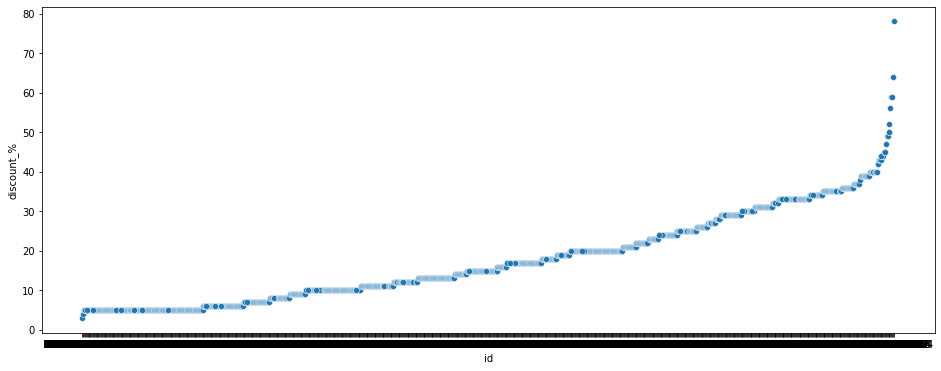

In [171]:
# Grafico de % de descuento por ítem. 
plt.figure(figsize=(16, 6))

scatter_plot = sns.scatterplot(data=price_discount_df.sort_values(by="discount_%", ascending=True), 
                           x="id", y="discount_%")

# Eliminar xticklabels

#### En el gráfico vemos que los descuentos por encima del 50% son outliers en nuestro dataset

### Análisis de descuentos por categoría. 

In [181]:
for category in set(price_discount_df["domain_id"].values):
    print(category)
    print(price_discount_df[price_discount_df["domain_id"] == category].describe())
    print("\n")

MLA-SUPPLEMENTS
             price  original_price   discount_$  discount_%
count    30.000000       30.000000    30.000000   30.000000
mean   1701.312667     2190.733333   489.420667   22.266667
std    1114.587884     1386.028584   355.978256    8.669937
min     429.000000      550.000000    27.500000    5.000000
25%     865.675000     1199.500000   250.000000   20.000000
50%    1373.000000     1800.500000   464.205000   24.500000
75%    2367.000000     2703.750000   578.847500   25.750000
max    4275.000000     5290.000000  1323.000000   36.000000


MLA-FANS
              price  original_price   discount_$  discount_%
count     40.000000       40.000000    40.000000   40.000000
mean    6436.103750     7675.211500  1239.107750   14.800000
std     3213.934039     3878.725825   947.284659    7.789539
min     3600.490000     3789.990000   189.500000    5.000000
25%     4695.607500     5593.500000   405.775000    7.000000
50%     5594.745000     6283.000000   902.000000   13.000000
75%   

              price  original_price    discount_$  discount_%
count     30.000000       30.000000     30.000000   30.000000
mean   11805.186000    14554.099667   2748.913667   13.433333
std    18644.813947    24770.302214   7173.929856    8.900536
min     1614.050000     1699.000000     84.950000    5.000000
25%     3099.000000     3899.000000    291.737500    5.000000
50%     4654.255000     5389.500000    750.000000   11.000000
75%     8407.400000     9248.250000   1238.500000   19.250000
max    69999.000000    99699.000000  34900.000000   35.000000


MLA-SMARTWATCHES
              price  original_price   discount_$  discount_%
count     19.000000       19.000000    19.000000   19.000000
mean    7738.581579     9117.421053  1378.839474   17.105263
std    12434.987072    13852.808088  1786.838847   10.613905
min     1209.000000     1300.000000    91.000000    5.000000
25%     2076.950000     2656.500000   342.580000    9.000000
50%     3880.000000     4299.000000   701.000000   13.000

In [203]:
# Seguramente haya una forma más elegante de hacer esto...

mean_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").mean()
median_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").median()
std_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").std()
q25_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").quantile(q=0.25)
q75_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").quantile(q=0.75)

agg_df = mean_df
agg_df.columns = ["mean"]
agg_df["q25"] = q25_df["discount_%"]
agg_df["median"] = median_df["discount_%"]
agg_df["q75"] = q75_df["discount_%"]
agg_df["std_err"] = std_df["discount_%"]

agg_df.reset_index(inplace=True)

agg_df

,domain_id,mean,q25,median,q75,std_err
0,MLA-ACTION_FIGURES,12.368421,5.00,9.5,13.00,11.485410
1,MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,11.055556,6.00,6.0,17.50,7.471296
2,MLA-BICYCLES,22.483333,10.00,29.0,33.00,11.368245
3,MLA-BOARD_GAMES,13.918367,10.00,13.0,17.00,7.102924
4,MLA-CELLPHONES,16.549020,9.50,14.0,21.50,8.431640
5,MLA-DESKTOP_COMPUTERS,24.238095,15.75,27.0,33.00,12.274919
6,MLA-DOLLS,15.272727,7.75,12.5,17.00,10.180195
7,MLA-FANS,14.800000,7.00,13.0,22.25,7.789539
8,MLA-GAME_CONSOLES,13.433333,5.00,11.0,19.25,8.900536
9,MLA-HAIR_CLIPPERS,23.984615,17.00,24.0,30.00,11.673277


Graficar ditribución en función de media, mediana y std_err

#### En la mayoría de las categorías se ve un patrón similar: la mediana adelantando levemente a la media, indicando una distribución con un skew levemente positivo. Esto tiene sentido, es de esperar que la mayoría de los descuentos tiendan a ser más pequeños. Es decir, que la densidad de la distribución sea mayor hacia los valores de descuento más pequeños y que la probabilidad decaiga a medida que los descuentos se hacen más grandes. Hay algunas excepciones, como el rubro de bicicletas, por ejemplo, o el de computadoras desktop. 
#### Los desvíos estándar de las muestras están entre un 0.5 y un 0.8 de los promedios correspondientes. Esto da cuenta de la variabilidad entre los valores de la muestra (los valores dentro de una misma categoría se encuentran muy alejados). Esto no es ideal, pero es lo que tenemos para trabjar, por lo que vamos a considerarlo un error aceptable. 

### Comparación entre categorías con más descuentos y categorías con mayores descuentos

In [223]:
# Ordeno el domain_id para poder graficar y comparar.
sort_list = top_categories_merge_df.sort_values(by="disc_raw_%", ascending=False)["domain_id"].values.tolist()
domain_id_order = pd.api.types.CategoricalDtype(sort_list, ordered=True)
agg_df["domain_id"] = agg_df["domain_id"].astype(domain_id_order)

agg_df.sort_values(by="domain_id", ascending=True, inplace=True)

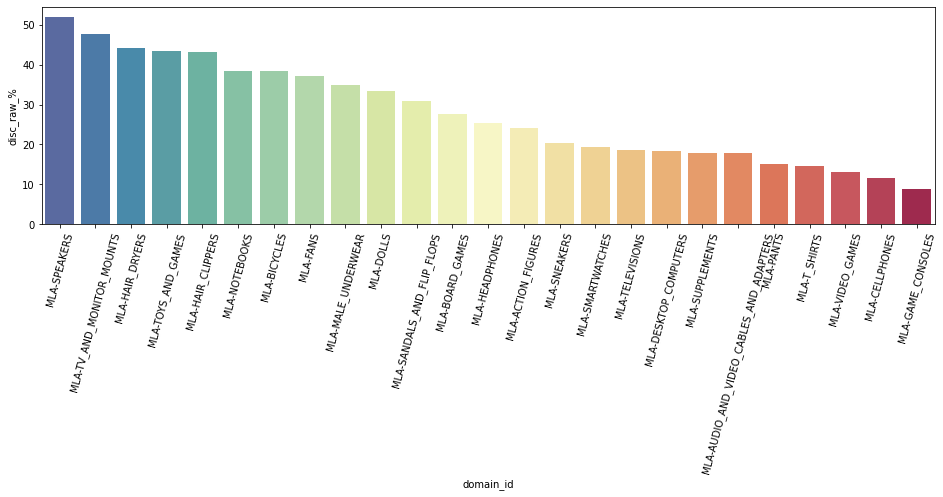

In [224]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=top_categories_merge_df.sort_values(by="disc_raw_%", ascending=False), 
                       x="domain_id", y="disc_raw_%", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

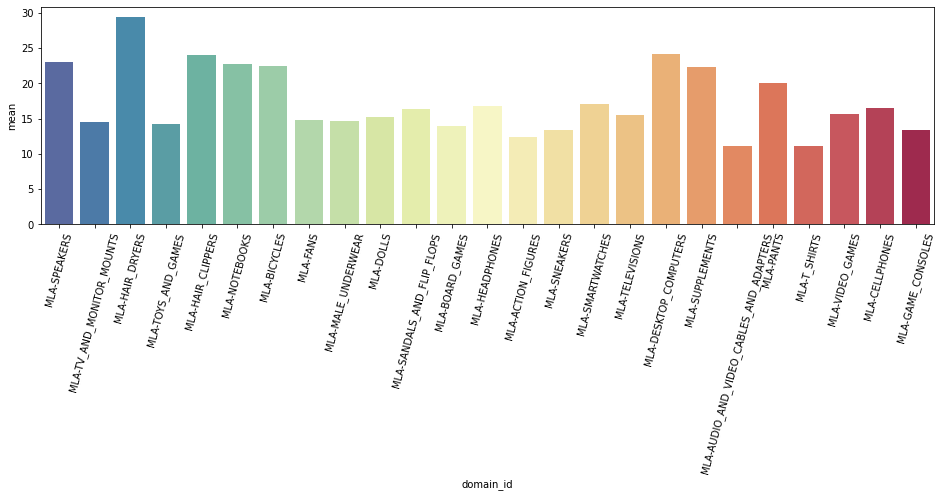

In [227]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=agg_df, x="domain_id", y="mean", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

Intentar graficar ambos en un mismo gráfico (valga la redundancia)

### Si bien ya se mencionó que, con los valores de desvío estándar obtenidos no se puede confiar mucho en los promedios obtenidos, la comparación sigue siendo válida. Se ve que la categoría que más descuentos ofrece no es necesariamente la que mejor descuentos ofrece. También se ve que la distribución de promedios de descuento es más uniforme que la distribución de cantidad de descuentos (de nuevo, si no se toma en cuenta el desvío estándar). 

#### Este análisis es interesante si uno se pone del lado del comprador. 
#### Por ejemplo, en el rubro de computadoras desktop, se ve que hay pocos descuentos (en relación a la cantidad de publicaciones), pero el descuento promedio (de las publicaciones con descuento) es alto. Entonces, desde el lado del consumidor, ver una computadora desktop con un buen descuento puede ser percibido como una oportunidad "aprovecho este buen descuento porque hay pocos"
#### El caso contrario es el de mounts para televisores y monitores. Este rubro no tiene los mejores descuentos, pero son abundantes. Desde el punto de vista del consumidor, se puede percibir como que "los mounts están baratos, aprovecho ahora a comprar con descuento"

#### El punto que quiero ilustrar es que en el primer caso el razonamiento es "necesito un producto, cuando vea un buen descuento lo aprovecho porque sé que hay pocos". Mientras que en el segundo el razonamiento es "No necesariamente necesito el producto ahora, pero aprovecho que bajaron de precio porque probablemente lo necesite en el futuro"

## La sigiuente pregunta es: ¿Afectan los descuentos a la venta de los items?

#### Resultaría interesante ver, para una misma categoría, si los artículos con descuento se venden más que los que no tienen descuento. (también hay que tener en cuenta la cantidad de publicaciones con descuento...)